In [1]:
import pandas as pd #for data handling
pd.options.display.max_rows = 999 #set the max no of rows you can see. 
pd.set_option('display.max_columns', 999) #another way to do the same thing

import seaborn as sns 
import numpy as np #for matrix operation
import matplotlib.pyplot as plt 

## Read all the datasets 

In [2]:
ping_df=pd.read_csv('~/Downloads/DS TakeHome Assignment/data/pings.csv')
driver_df=pd.read_csv('~/Downloads/DS TakeHome Assignment/data/drivers.csv')
test_df=pd.read_csv('~/Downloads/DS TakeHome Assignment/data/test.csv')

# Exploratory Data Analysis

In [3]:
ping_df.head()

,driver_id,ping_timestamp
0,899313,1496278800
1,373017,1496278800
2,798984,1496278800
3,245966,1496278800
4,689783,1496278800


In [4]:
len(ping_df.driver_id.unique()) ## Number of unique drivers

2480

In [5]:
ping_df.isnull().sum().sum()  ## This gives that there are no missing value in ping data

0

In [6]:
ping_df.shape ## number of rows and columns in ping_df

(50528701, 2)

In [7]:
ping_df.drop_duplicates(inplace=True) ## Only keep the unique rows in the dataframe

In [8]:
ping_df.shape ## Now after removing duplicate rows number of rows and columns in ping_df

(50489158, 2)

###  Add a date variable i.e. convert unix timestamp to date

In [9]:
ping_df['datetime'] = pd.to_datetime(ping_df['ping_timestamp'],unit='s') ### Converting to datetime

In [10]:
ping_df['date']=ping_df['datetime'].dt.date  ### Adding a variable date

In [11]:
ping_df.sample(5)

,driver_id,ping_timestamp,datetime,date
6913652,551932,1496520075,2017-06-03 20:01:15,2017-06-03
5288834,794848,1496457615,2017-06-03 02:40:15,2017-06-03
22819982,937299,1497077655,2017-06-10 06:54:15,2017-06-10
46425505,662447,1497941100,2017-06-20 06:45:00,2017-06-20
50496696,691726,1498087155,2017-06-21 23:19:15,2017-06-21


## We will now create our target variable i.e. online hours of a driver from this ping dataset. As we are getting pings every 15 seconds, we will assume every ping says that driver was online for 15 seconds.

### We will group by driver id and the date and get the count of pings, and then multiply the count with 15/3600 so that we get the number of hours the driver was online

In [12]:
ping_counts_df = ping_df.groupby(['driver_id', 'date']).size().reset_index(name='counts')

In [13]:
ping_counts_df.sample(5)

,driver_id,date,counts
16464,466593,2017-06-07,973
10207,338347,2017-06-05,2271
18208,506329,2017-06-04,1147
28927,735712,2017-06-04,1090
18920,521926,2017-06-02,1545


In [14]:
ping_counts_df.columns

Index(['driver_id', 'date', 'counts'], dtype='object')

In [15]:
del ping_df ## Deleting the ping dataframe to free space

In [16]:
ping_counts_df['counts'].sum() ## Just to check if we got the counts right

50489158

In [17]:
ping_counts_df['counts'] = ping_counts_df['counts']*15/3600 ## Converting into hours 

In [18]:
ping_counts_df['counts'].sum()  ## Checking it again

210371.49166666667

In [19]:
50489158*15/3600

210371.49166666667

In [20]:
ping_counts_df.rename(columns={'counts': 'online_hours'}, inplace=True)

In [21]:
ping_counts_df.head()

,driver_id,date,online_hours
0,111556,2017-06-01,2.016667
1,111556,2017-06-02,2.266667
2,111556,2017-06-05,4.229167
3,111556,2017-06-06,2.775000
4,111556,2017-06-07,2.383333


## Now looking at the drivers profile

In [22]:
driver_df.sample(5)

,driver_id,gender,age,number_of_kids
207,847300,MALE,40,1
670,958988,MALE,33,2
1558,742644,MALE,40,0
1422,142752,MALE,63,3
1006,392710,MALE,27,0


In [23]:
driver_df.describe()

,driver_id,age,number_of_kids
count,2500.000000,2500.000000,2500.000000
mean,562397.047200,35.922400,1.395200
std,256410.208166,14.171207,1.505697
min,111556.000000,18.000000,0.000000
25%,343199.000000,25.000000,0.000000
50%,563854.500000,31.000000,1.000000
75%,787978.750000,45.000000,3.000000
max,998740.000000,75.000000,4.000000


### Above we can see that age lies between 18 and 75 and number of kids lie between 0 and 4, so logically there are no outliers in these columns

In [24]:
driver_df.gender.value_counts()

MALE      1894
FEMALE     606
Name: gender, dtype: int64

In [25]:
driver_df.isnull().sum().sum()  ## This gives that there are no missing value in driver data

0

Text(0.5, 1.0, 'Female')

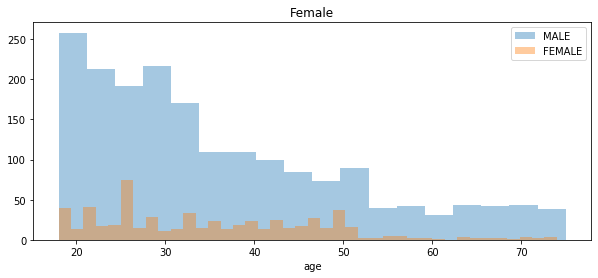

In [26]:
male = 'MALE'
female = 'FEMALE'
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 4))
ax = sns.distplot(driver_df[driver_df['gender']=='MALE'].age, bins=18, label = male, ax = axes, kde =False)
ax = sns.distplot(driver_df[driver_df['gender']=='FEMALE'].age, bins=40, label = female, ax = axes, kde =False)
ax.legend()
ax.set_title('Female')

In [27]:
driver_df.shape ## Number of rows and columns of driver profiles

(2500, 4)

In [28]:
driver_df.drop_duplicates(inplace=True)  ## Remove any duplicate rows from driver df

In [29]:
driver_df.shape ### Number of rows and columns of unique driver profiles

(2500, 4)

In [30]:
len(driver_df.driver_id.unique()) ## Number of unique driver ids

2497

### Above shows that there are 2497 unique ids and 2500 rows of unique profiles, that means there are 3 duplicate driver ids, Let's find them

In [31]:
driver_df[driver_df.duplicated(['driver_id'], keep=False)]

,driver_id,gender,age,number_of_kids
231,320227,MALE,22,4
388,320227,MALE,42,4
1311,799250,FEMALE,27,4
1550,800600,FEMALE,22,0
1765,799250,FEMALE,23,0
2008,800600,FEMALE,28,1


## We will assume that the latest entry of a driver would be legit one, so we are taking the last row of each unique driver_ids

In [32]:
driver_df.drop_duplicates(subset='driver_id', keep="last", inplace=True) 

In [33]:
driver_df.shape

(2497, 4)

### Converting gender object to int object by creating every gender as a different variable and inserting binary values, we will use get_dummies function and we will drop the first gender as otherwise that will create colinearity

In [34]:
gender_dummy = pd.get_dummies(driver_df['gender'], prefix = 'gender', drop_first = True)

In [35]:
driver_df = pd.concat([driver_df, gender_dummy], axis = 1)
driver_df.drop('gender', axis=1, inplace=True)

In [36]:
driver_df.sample(5)

,driver_id,age,number_of_kids,gender_MALE
126,615105,20,0,1
1479,290726,29,4,1
2404,497775,18,0,1
225,605497,45,0,0
1567,914502,37,3,1


## Now, to create a final train data, we will join the driver df and ping count df and test data will be created by joining test df and drivers df

In [37]:
train_df = pd.merge(ping_counts_df,driver_df, on = 'driver_id' )

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41676 entries, 0 to 41675
Data columns (total 6 columns):
driver_id         41676 non-null int64
date              41676 non-null object
online_hours      41676 non-null float64
age               41676 non-null int64
number_of_kids    41676 non-null int64
gender_MALE       41676 non-null uint8
dtypes: float64(1), int64(3), object(1), uint8(1)
memory usage: 1.9+ MB


In [39]:
train_df.sample(5)

,driver_id,date,online_hours,age,number_of_kids,gender_MALE
83,112609,2017-06-11,4.879167,55,0,1
37638,919201,2017-06-15,3.212500,29,0,1
5050,228093,2017-06-12,2.108333,55,4,1
2254,165671,2017-06-05,1.145833,37,3,0
41451,994686,2017-06-19,5.758333,41,2,0


In [40]:
test_df = pd.merge(test_df, driver_df, on = 'driver_id') ## Join test with the driver profile

In [41]:
test_df.sample(5)

,driver_id,date,online_hours,age,number_of_kids,gender_MALE
10540,947224,2017-6-23,9,41,3,1
5328,498612,2017-6-27,5,42,3,1
3971,627265,2017-6-26,8,61,3,1
10157,227852,2017-6-28,6,28,0,1
961,785617,2017-6-26,10,19,4,1


## We need to derive day and month variables and then convert it into int by get_dummies, we will have to concatenate train and test datasets as it might happen that test_dataset have only one day's data which then won't be able to get all the weekday variables, so we will use get_dummies for all the dataset, including train and test. 
## We will convert the day of week to int for modeling, we will convert every weekday as new variable and binary value will be inserted. This can be done by the below get_dummies function. We will remove first day because that will create colinearity (As sum of all will be 1 in that case)
## Deriving  month and day variables so that we have some x features (as actual date and datetime can't be used for prediction because the test data won't have the same dates )

In [42]:
train_df['data_name'] = 'train' ## To identify the train dataset for separating it again

In [43]:
test_df['data_name'] = 'test'  ## To identify the test dataset for separating it again

In [44]:
train_df.sample(5)

,driver_id,date,online_hours,age,number_of_kids,gender_MALE,data_name
33202,825482,2017-06-06,2.829167,22,0,0,train
29377,743589,2017-06-06,1.683333,46,3,1,train
40183,970819,2017-06-05,6.866667,44,4,1,train
19213,527336,2017-06-08,4.491667,45,1,0,train
40439,976598,2017-06-16,7.616667,20,0,1,train


In [45]:
test_df.sample(5)

,driver_id,date,online_hours,age,number_of_kids,gender_MALE,data_name
1065,794309,2017-6-27,6,36,4,1,test
176,111556,2017-6-27,3,49,4,0,test
3749,418030,2017-6-24,0,25,2,0,test
9340,370305,2017-6-26,1,31,4,1,test
6977,985189,2017-6-23,8,24,0,1,test


In [46]:
train_test_df = pd.concat([train_df,test_df],axis=0)

In [47]:
train_test_df.sample(5)

,driver_id,date,online_hours,age,number_of_kids,gender_MALE,data_name
11171,352080,2017-06-20,0.325000,44,1,0,train
29529,746313,2017-06-10,7.379167,18,0,0,train
25165,651262,2017-06-19,3.404167,24,0,0,train
12730,385665,2017-06-02,0.591667,45,0,1,train
13843,377034,2017-6-24,4.000000,67,0,1,test


In [48]:
day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [49]:
def get_train_test_df(train_test_df, day_of_week):
    train_test_df['date'] = pd.to_datetime(train_test_df['date'])
    train_test_df['dom']=train_test_df['date'].dt.day  ### Adding a variable day of month
    train_test_df['dow']=train_test_df['date'].dt.dayofweek.map(day_of_week)  ### Adding a variable day of the week
    train_test_df['month']=train_test_df['date'].dt.month  ### Adding a variable month of the year
    dummy = pd.get_dummies(train_test_df['dow'], prefix = 'dow', drop_first = True)
    train_test_df = pd.concat([train_test_df, dummy], axis = 1)
    train_test_df.drop('dow', axis=1, inplace=True)
    train_df = train_test_df[train_test_df.data_name =='train'].drop(['data_name','date'],axis=1)
    test_df = train_test_df[train_test_df.data_name =='test'].drop(['data_name','date'],axis=1)
    return train_df, test_df

In [50]:
train_df, test_df = get_train_test_df(train_test_df=train_test_df, day_of_week=day_of_week)

In [51]:
train_df.sample(5)

,driver_id,online_hours,age,number_of_kids,gender_MALE,dom,month,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
35395,876132,6.400000,31,3,1,15,6,0,0,0,1,0,0
18282,507766,9.325000,34,3,1,15,6,0,0,0,1,0,0
12434,379590,6.850000,29,0,1,4,6,0,0,1,0,0,0
23206,612836,1.666667,23,0,0,11,6,0,0,1,0,0,0
31701,794013,2.270833,50,2,1,21,6,0,0,0,0,0,1


In [52]:
test_df.sample(5)

,driver_id,online_hours,age,number_of_kids,gender_MALE,dom,month,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
11839,876124,10.0,48,3,1,26,6,1,0,0,0,0,0
912,936069,2.0,42,4,1,26,6,1,0,0,0,0,0
11116,443764,4.0,22,0,1,28,6,0,0,0,0,0,1
16637,859423,8.0,21,0,1,23,6,0,0,0,0,0,0
6408,221336,0.0,18,0,1,25,6,0,0,1,0,0,0


/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


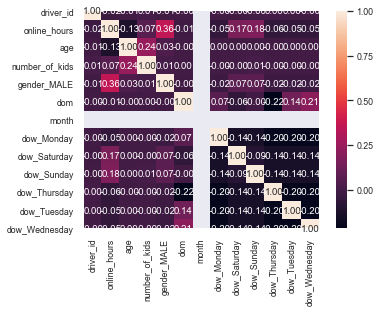

In [53]:
correlation_map = np.corrcoef(train_df.values.T)
sns.set(font_scale=0.8)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=train_df.columns, xticklabels=train_df.columns)

plt.show()

### Above shows that there are no high correlation between the x variables

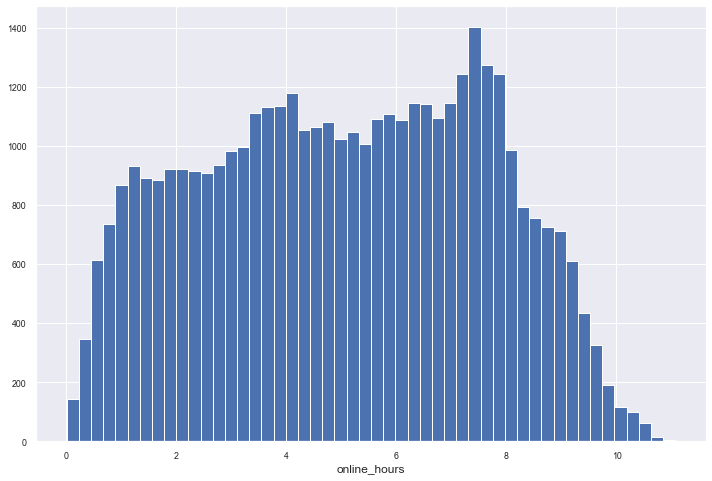

In [54]:
plt.figure(figsize=(12,8))
plt.hist(train_df.online_hours.values, bins=50)
plt.xlabel('online_hours', fontsize=12)
plt.show()

### Above shows the histogram of online hours

## Creating Train and test X and Y variable

In [55]:
X_train = train_df
Y_train = X_train['online_hours'].values
X_train = X_train.drop('online_hours', axis = 1).values

In [56]:
X_test = test_df
Y_test = X_test['online_hours'].values
X_test = X_test.drop('online_hours', axis = 1).values

# Modeling

In [57]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [59]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=5)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    model_cv_score = "%s: mean: %f , sd: %f" % (name, cv_results.mean(), cv_results.std())
    print(model_cv_score)

ScaledLR: mean: -5.138062 , sd: 0.131067
ScaledLASSO: mean: -6.463259 , sd: 0.187020
ScaledEN: mean: -6.030071 , sd: 0.166924
ScaledKNN: mean: -6.061834 , sd: 0.205751
ScaledCART: mean: -10.353689 , sd: 0.704090
ScaledGBM: mean: -5.209813 , sd: 0.354412


/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/keshav.so

ScaledRF: mean: -7.257589 , sd: 0.480903


/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/keshav.somani/.py_venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/keshav.somani/.py_venv/lib/

ScaledSVR: mean: -5.162834 , sd: 0.202581


### It looks like Linear Regression is giving the best results. Gradient Boosting and XGB has also given comparable results, lets check using grid search if there are any n_estimator which can give a better result than LR 

In [60]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350]))
model = GradientBoostingRegressor(random_state=5)
kfold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-5.052051 (0.132855) with: {'n_estimators': 50}
-5.216705 (0.364624) with: {'n_estimators': 100}
-5.288348 (0.423235) with: {'n_estimators': 150}
-5.313801 (0.446506) with: {'n_estimators': 200}
-5.337480 (0.470168) with: {'n_estimators': 250}
-5.344755 (0.469496) with: {'n_estimators': 300}
-5.359175 (0.477089) with: {'n_estimators': 350}
Best: -5.052051 using {'n_estimators': 50}


## It can be observed that n_estimators 50 has given better results on GBM and that is better than Linear Regression as well. But we will keep both of the models to test on test data 

## Below gridsearch was time consuming. So took the default SVR hyperparameters

In [61]:
# Cs = [0.001, 0.01, 0.1, 1, 10]
# gammas = [0.001, 0.01, 0.1, 1]
# param_grid = {'C': Cs, 'gamma' : gammas}
# kfold = KFold(n_splits=10, random_state=5)
# model_svr = SVR(kernel='rbf')
# grid_search = GridSearchCV(model_svr, param_grid, cv=kfold)
# grid_search.fit(X_train, Y_train)
# grid_search.best_params_

In [62]:
from sklearn.metrics import mean_squared_error

## Scaling the datasets train and test

In [63]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

# Now scale the test dataset
rescaled_X_test = scaler.transform(X_test)

In [64]:
model_gbm = GradientBoostingRegressor(random_state=5, n_estimators=50)
model_gbm.fit(rescaled_X_train, Y_train)
predictions_gbm = model_gbm.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions_gbm))

17.50171338563262


In [65]:
model_lr = LinearRegression()
model_lr.fit(rescaled_X_train, Y_train)
predictions_lr = model_lr.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions_lr))

12.175311037762143


In [66]:
model_svr = SVR(gamma='auto')
model_svr.fit(rescaled_X_train, Y_train)
predictions_svr = model_svr.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions_svr))

12.784650223364121


## Ensembling LR & GBM & SVR, LR & GBM, SVR & GBM and LR &SVR

In [67]:
predictions_lr_gbm_svr = (predictions_gbm+predictions_lr+predictions_svr)/3
print (mean_squared_error(Y_test, predictions_lr_gbm_svr))

12.432577564280596


In [68]:
predictions_lr_gbm = (predictions_gbm+predictions_lr)/2
print (mean_squared_error(Y_test, predictions_lr_gbm))

12.738536872393366


In [69]:
predictions_svr_gbm = (predictions_gbm+predictions_svr)/2
print (mean_squared_error(Y_test, predictions_svr_gbm))

13.671403968764658


In [70]:
predictions_svr_lr = (predictions_lr+predictions_svr)/2
print (mean_squared_error(Y_test, predictions_svr_lr))

12.178777340163041


## As observed, LR is performing better than GBM, SVR and their ensembles, so we will finalize LR as our final model

In [71]:
model_lr = LinearRegression()
model_lr.fit(rescaled_X_train, Y_train)
predictions_lr = model_lr.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions_lr))

12.175311037762143


In [72]:
comparison_df = pd.DataFrame({'Prediction': predictions_lr, 'Actual Test Data' : Y_test})
comparison_df.head(10)

,Prediction,Actual Test Data
0,5.567263,7.0
1,5.575371,9.0
2,5.564778,9.0
3,7.064376,10.0
4,6.982349,9.0
5,5.593490,8.0
6,5.528840,7.0
7,4.619039,0.0
8,4.627146,4.0
9,4.616553,4.0
